![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## ⌛️ Time is ticking. Good luck!

In [143]:
import pandas as pd
bees = pd.read_csv("data/plants_and_bees.csv")
bees

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


## Import Analytic Libraries

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [145]:
np.random.seed(26)
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

## 1) Data Preprossing

In [146]:
print(f'Total number of readings: {len(bees)}')

Total number of readings: 1250


In [147]:
# Make a Panda Series which has the percentage of missing values in each column.
bees_na_percentages = pd.Series(100 * bees.isna().sum() / len(bees), name="'NaN' Percentage (%)")

# Display only the columns with missing values and their respective percentages
print(bees_na_percentages.loc[bees_na_percentages != 0])

specialized_on    99.44
parasitic          5.04
nesting            4.32
status            98.80
nonnative_bee      4.88
Name: 'NaN' Percentage (%), dtype: float64


`parasitic`, `nesting` and `nonnative_bee` have missing data <strong>5%</strong> or less. We will disregard those readings from the dataset

In [148]:
bees.dropna(subset=['parasitic', 'nesting', 'nonnative_bee'], inplace=True)
bees.reset_index(inplace=True, drop=True)

In [149]:
# Rename 'native' and 'nonnative' columns to 'is_native_plant' and 'is_native_bee', respectively
bees.rename(columns={'native_or_non': 'is_native_plant', 'nonnative_bee': 'is_native_bee'}, inplace=True)

In [150]:
# Replace 'native' with 1 and 'non-native' with 0 in the 'is_native_plant' column
bees['is_native_plant'] = bees['is_native_plant'].replace({'native': 1, 'non-native': 0})

In [151]:
# Invert values in the 'is_native_bee' column
bees['is_native_bee'] = 1 - bees['is_native_bee']

In [152]:
# Create a new column 'is_late_season' with 0 for early season and 1 for late season
bees['is_late_season'] = bees['season'].apply(lambda x: 1 if x == 'late.season' else 0)
bees.drop('season', axis=1, inplace=True)

In [153]:
# Replace 'sampling' with 'is_hand_netting' and set values to 1 for 'hand.netting' and 0 for 'pan.trap'
bees.rename(columns={'sampling': 'is_hand_netting'}, inplace=True)
bees['is_hand_netting'] = bees['is_hand_netting'].replace({'hand netting': 1, 'pan traps': 0})

In [154]:
# Replace 'sex' with 'is_female_bee' and set values to 1 for 'female' and 0 for 'male'
bees.rename(columns={'sex': 'is_female_bee'}, inplace=True)
bees['is_female_bee'] = bees['is_female_bee'].replace({'f': 1, 'm': 0})

In [155]:
# Rename 'parasitic' column to 'is_parasitic'
bees.rename(columns={'parasitic': 'is_parasitic'}, inplace=True)

In [156]:
# Convert the 'site' column in the 'bees' dataframe to a categorical data type
bees['site'] = bees['site'].astype('category')

In [157]:
# Convert the 'nesting' column in the 'bees' dataframe to a categorical data type
bees['nesting'] = bees['nesting'].astype('category')

### Let's see how the dataset has changed


In [158]:
display(f'Total number of readings: {len(bees)}')

'Total number of readings: 1182'

We dropped 68/1250 readings. Remaining two columns are <strong>99% Empty!</strong>. We will drop them.

In [159]:
bees_na_percentages = pd.Series(100 * bees.isna().sum() / len(bees), name="'NaN' Percentage (%)")
display(bees_na_percentages.loc[bees_na_percentages != 0])

specialized_on    99.830795
status            99.238579
Name: 'NaN' Percentage (%), dtype: float64

These columns have are mostly empty and will be dropped.

In [160]:
bees.drop(columns=['specialized_on', 'status'], inplace=True)
bees.reset_index(inplace=True, drop=True)

### Concatenate date and time data to datetime object

In [161]:
bees['time'] = bees['time'].astype(str).transform(lambda time_str: " {}:{}".format(time_str[:-2], time_str[-2:]))

In [162]:
bees['datetime'] = bees['date']+bees['time']
# Convert 'datetime' column to datetime object
bees['datetime'] = pd.to_datetime(bees['datetime'])

In [163]:
# Clean datetime column by dropping date and time columns and moving datetime to the front
bees = bees[['datetime', 'sample_id', 'species_num', 'site', 'plant_species', 'bee_species', 'nesting', 'is_native_plant', 'is_native_bee', 'is_late_season', 'is_hand_netting', 'is_parasitic',]]

In [164]:
bees

,datetime,sample_id,species_num,site,plant_species,bee_species,nesting,is_native_plant,is_native_bee,is_late_season,is_hand_netting,is_parasitic
0,2017-04-18 09:35:00,17400,23,A,None,Augochlorella aurata,ground,1,1.0,0,0,0.0
1,2017-04-18 09:35:00,17400,23,A,None,Agapostemon texanus,ground,1,1.0,0,0,0.0
2,2017-04-18 09:35:00,17400,23,A,None,Augochlorella aurata,ground,1,1.0,0,0,0.0
3,2017-04-18 09:35:00,17400,23,A,None,Andrena carlini,ground,1,1.0,0,0,0.0
4,2017-04-18 09:35:00,17400,23,A,None,Andrena perplexa,ground,1,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2017-08-02 09:30:00,17481,11,B,Cichorium intybus,Halictus poeyi/ligatus,ground,0,1.0,1,1,0.0
1178,2017-08-02 09:30:00,17481,11,B,Cichorium intybus,Halictus poeyi/ligatus,ground,0,1.0,1,1,0.0
1179,2017-08-02 09:30:00,17481,11,B,Cichorium intybus,Halictus poeyi/ligatus,ground,0,1.0,1,1,0.0
1180,2017-08-02 09:30:00,17481,11,B,Cichorium intybus,Halictus poeyi/ligatus,ground,0,1.0,1,1,0.0


In [165]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         1182 non-null   datetime64[ns]
 1   sample_id        1182 non-null   int64         
 2   species_num      1182 non-null   int64         
 3   site             1182 non-null   category      
 4   plant_species    1182 non-null   object        
 5   bee_species      1182 non-null   object        
 6   nesting          1182 non-null   category      
 7   is_native_plant  1182 non-null   int64         
 8   is_native_bee    1182 non-null   float64       
 9   is_late_season   1182 non-null   int64         
 10  is_hand_netting  1182 non-null   int64         
 11  is_parasitic     1182 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 95.1+ KB


# 2) Exploratory Data Analysis

<AxesSubplot: xlabel='bee_species', ylabel='site'>

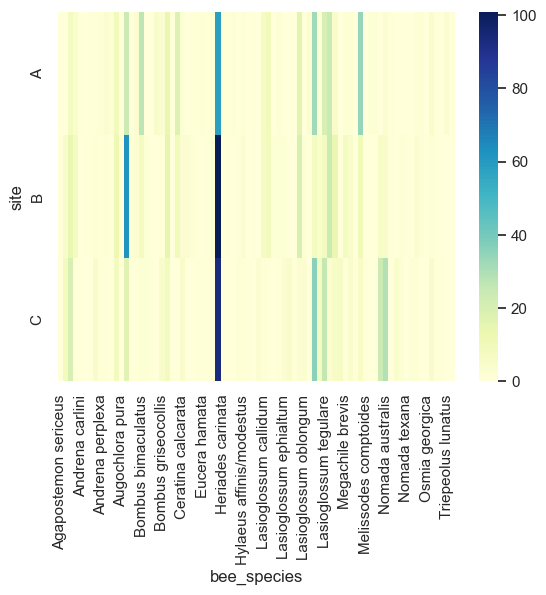

In [166]:
# Pivot the bees dataframe to create a matrix of bee counts by site and bee species
bees_pivot = bees.pivot_table(index='site', columns='bee_species', values='species_num', aggfunc='count')

# Create the heatmap using seaborn
sns.heatmap(bees_pivot, cmap='YlGnBu')

In [167]:
def calculate_top_category_count(data, column, target=0.50):
    category_counts = data[column].value_counts(normalize=True)
    cumulative_proportions = category_counts.cumsum()
    num_top_categories = (cumulative_proportions <= target).sum()
    return num_top_categories

# Calculate the top category counts
bee_species_top_50 = calculate_top_category_count(bees, 'bee_species')
bee_species_top_60 = calculate_top_category_count(bees, 'bee_species', target=0.6)
bee_species_top_70 = calculate_top_category_count(bees, 'bee_species', target=0.7)
bee_species_top_80 = calculate_top_category_count(bees, 'bee_species', target=0.8)
bee_species_top_90 = calculate_top_category_count(bees, 'bee_species', target=0.9)

# Define the x-axis labels and corresponding values
labels = ['50%', '60%', '70%', '80%', '90%']
values = [bee_species_top_50, bee_species_top_60, bee_species_top_70, bee_species_top_80,
          bee_species_top_90]

import pandas as pd

# Create a dataframe with the labels and values
df = pd.DataFrame({'labels': labels, 'values': values})

# Print the dataframe
print(df)

  labels  values
0    50%       6
1    60%       9
2    70%      12
3    80%      18
4    90%      30


<AxesSubplot: >

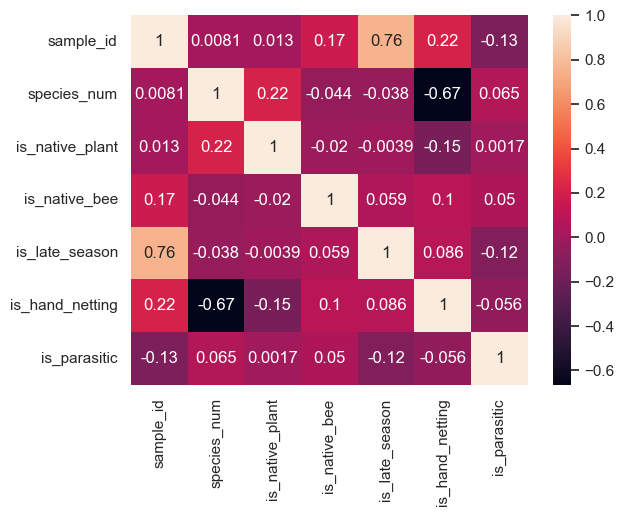

In [168]:
sns.heatmap(data=bees.corr(), annot=True)

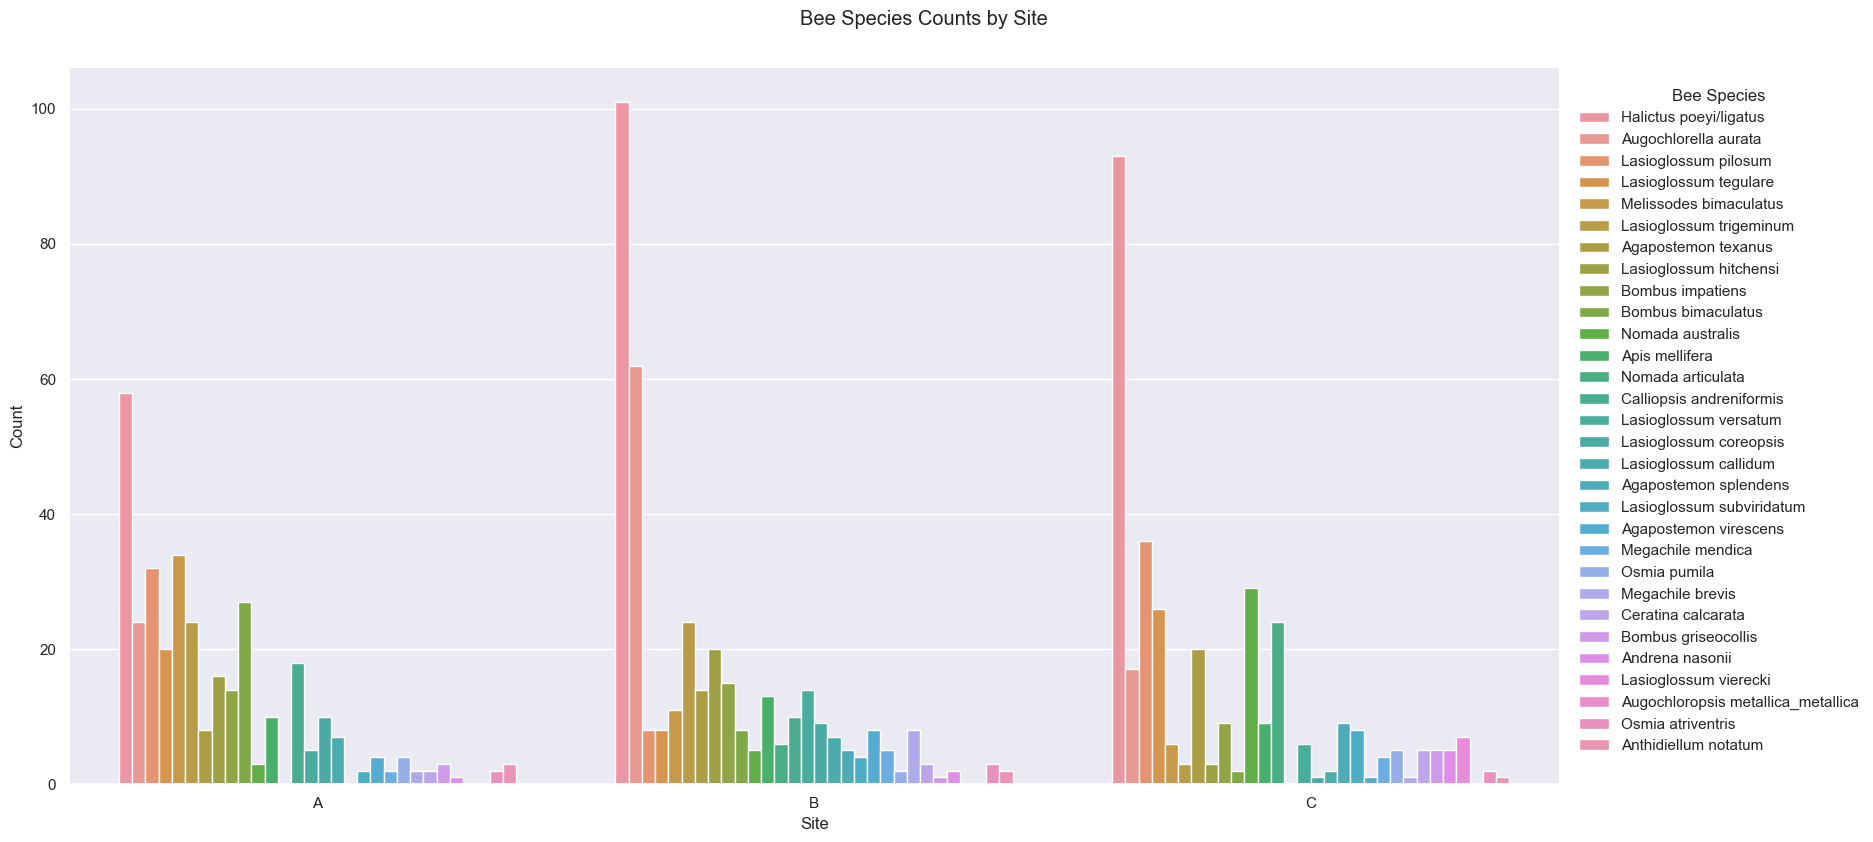

In [169]:
total_bee_counts_list_ordered = bees['bee_species'].value_counts().nlargest(30).index.to_list()

# Group bee species counts by site
site_bee_counts = bees.groupby('site')['bee_species'].value_counts().reset_index(name='count')

# Plot bar chart of bee species counts by site
sns.set_palette('pastel')
g = sns.catplot(x='site', y='count', hue='bee_species', hue_order=total_bee_counts_list_ordered, data=bee_counts, kind='bar', height=8, aspect=2)
g.fig.suptitle('Bee Species Counts by Site', y=1.05)
g.set(xlabel='Site', ylabel='Count')
# g._legend.set_bbox_to_anchor((0.5, -0.2))
g._legend.set_title('Bee Species')

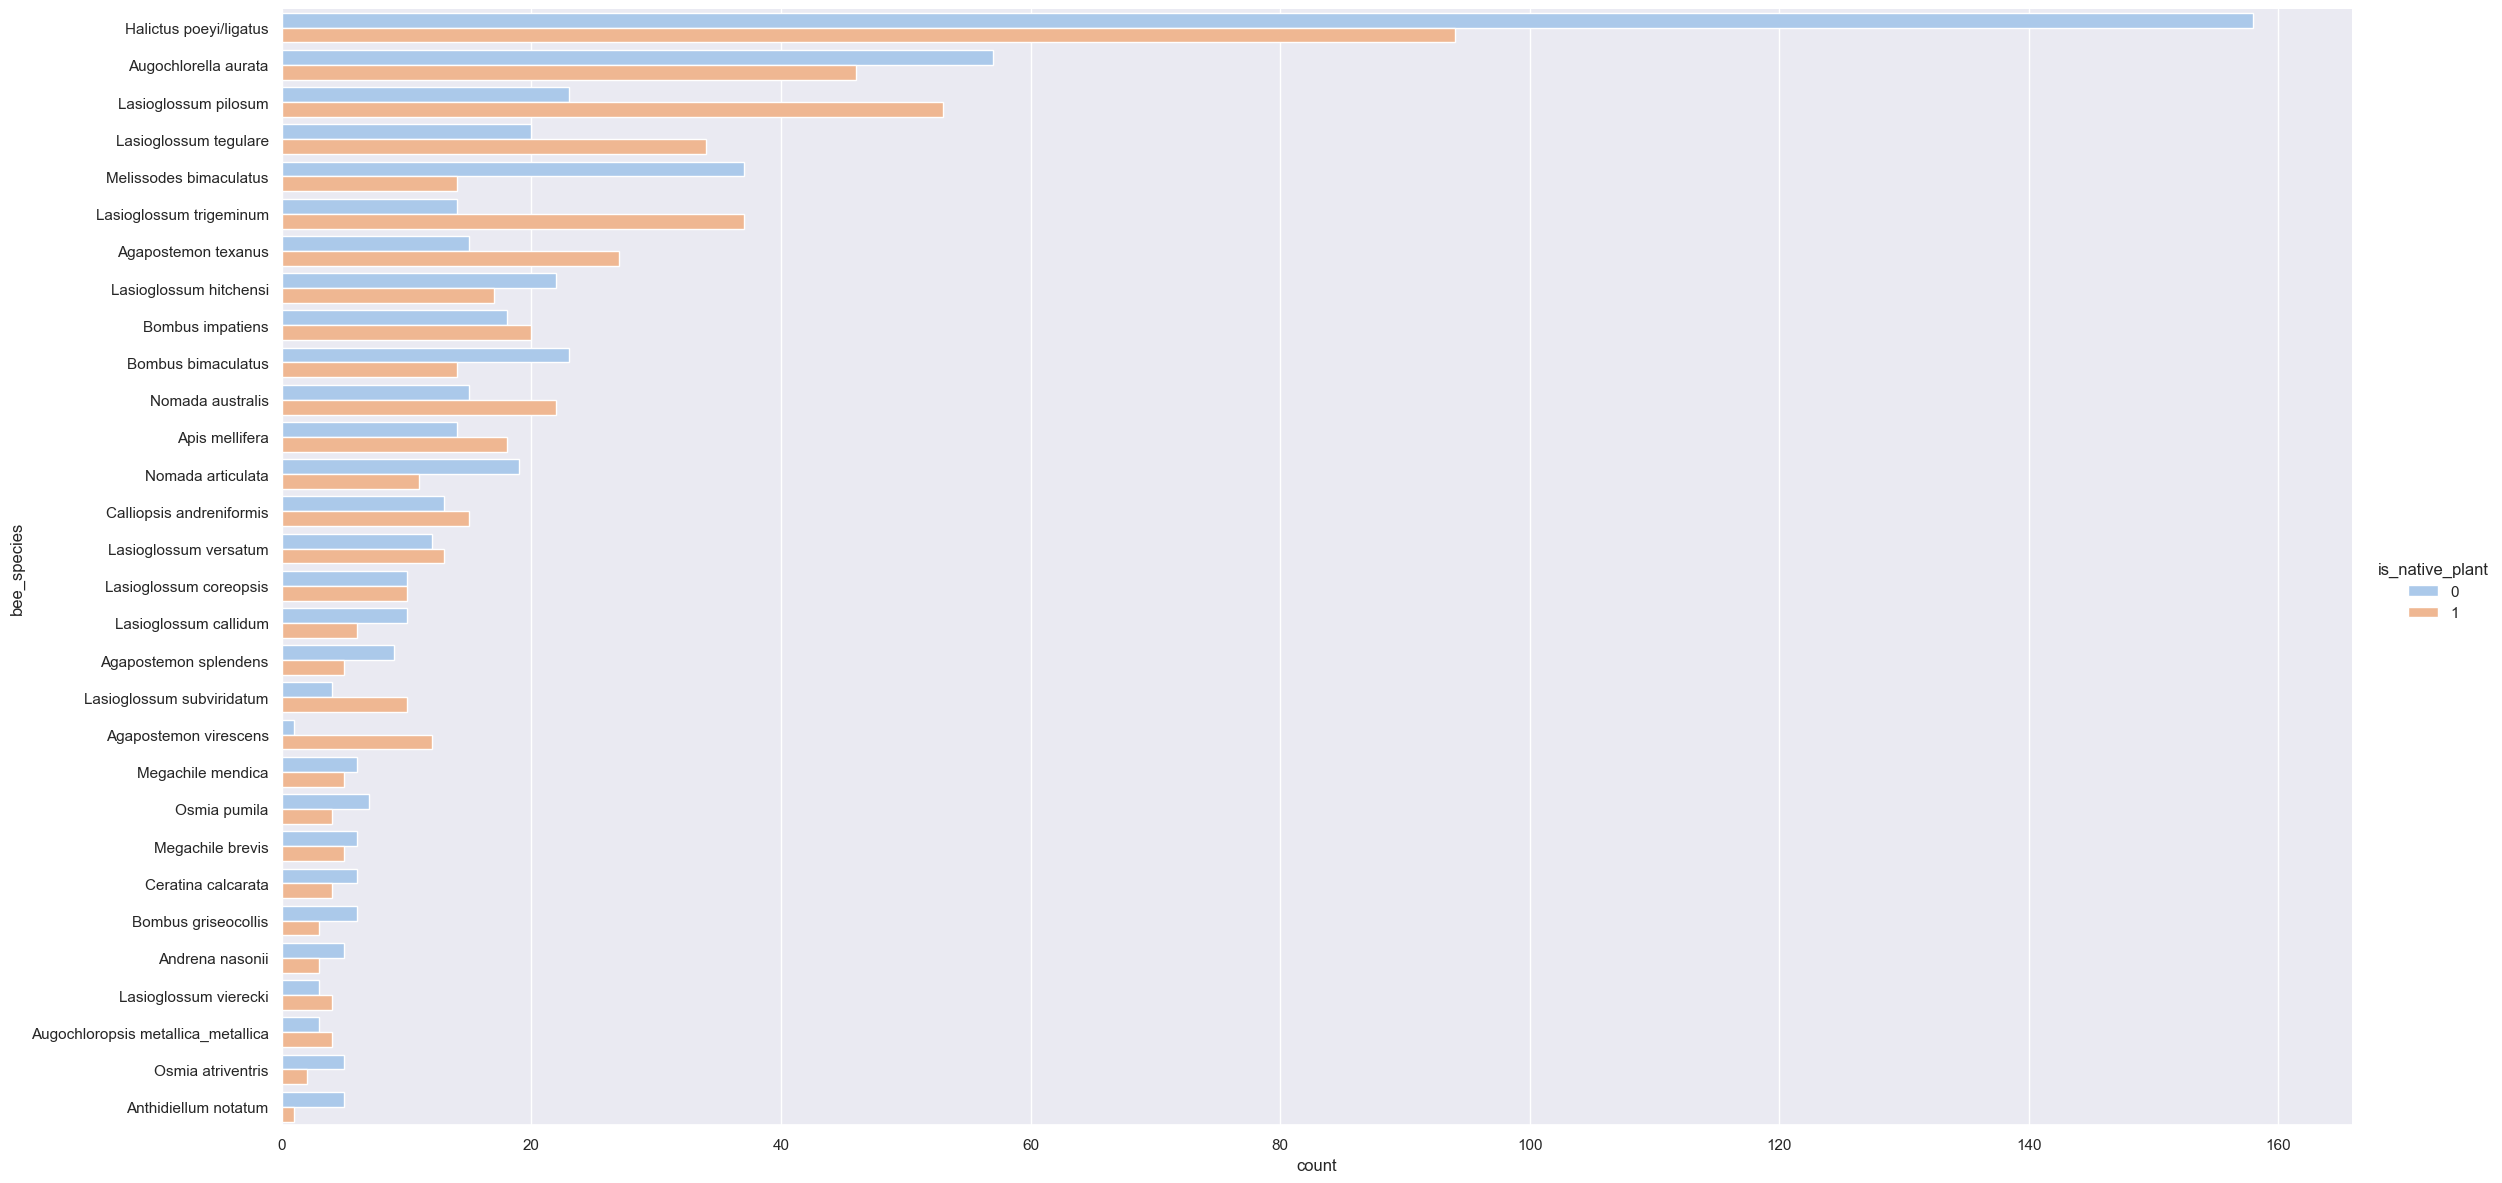

In [170]:
# Get the total bee species counts and order them
total_bee_counts = bees['bee_species'].value_counts().nlargest(30)
total_bee_counts_ordered = total_bee_counts.sort_values(ascending=False).index.to_list()

# Plot bar chart of bee species counts ordered by total count
sns.set_palette('pastel')
g = sns.catplot(y='bee_species', hue='is_native_plant', data=bees, kind='count', height=12, aspect=2, order=total_bee_counts_ordered)

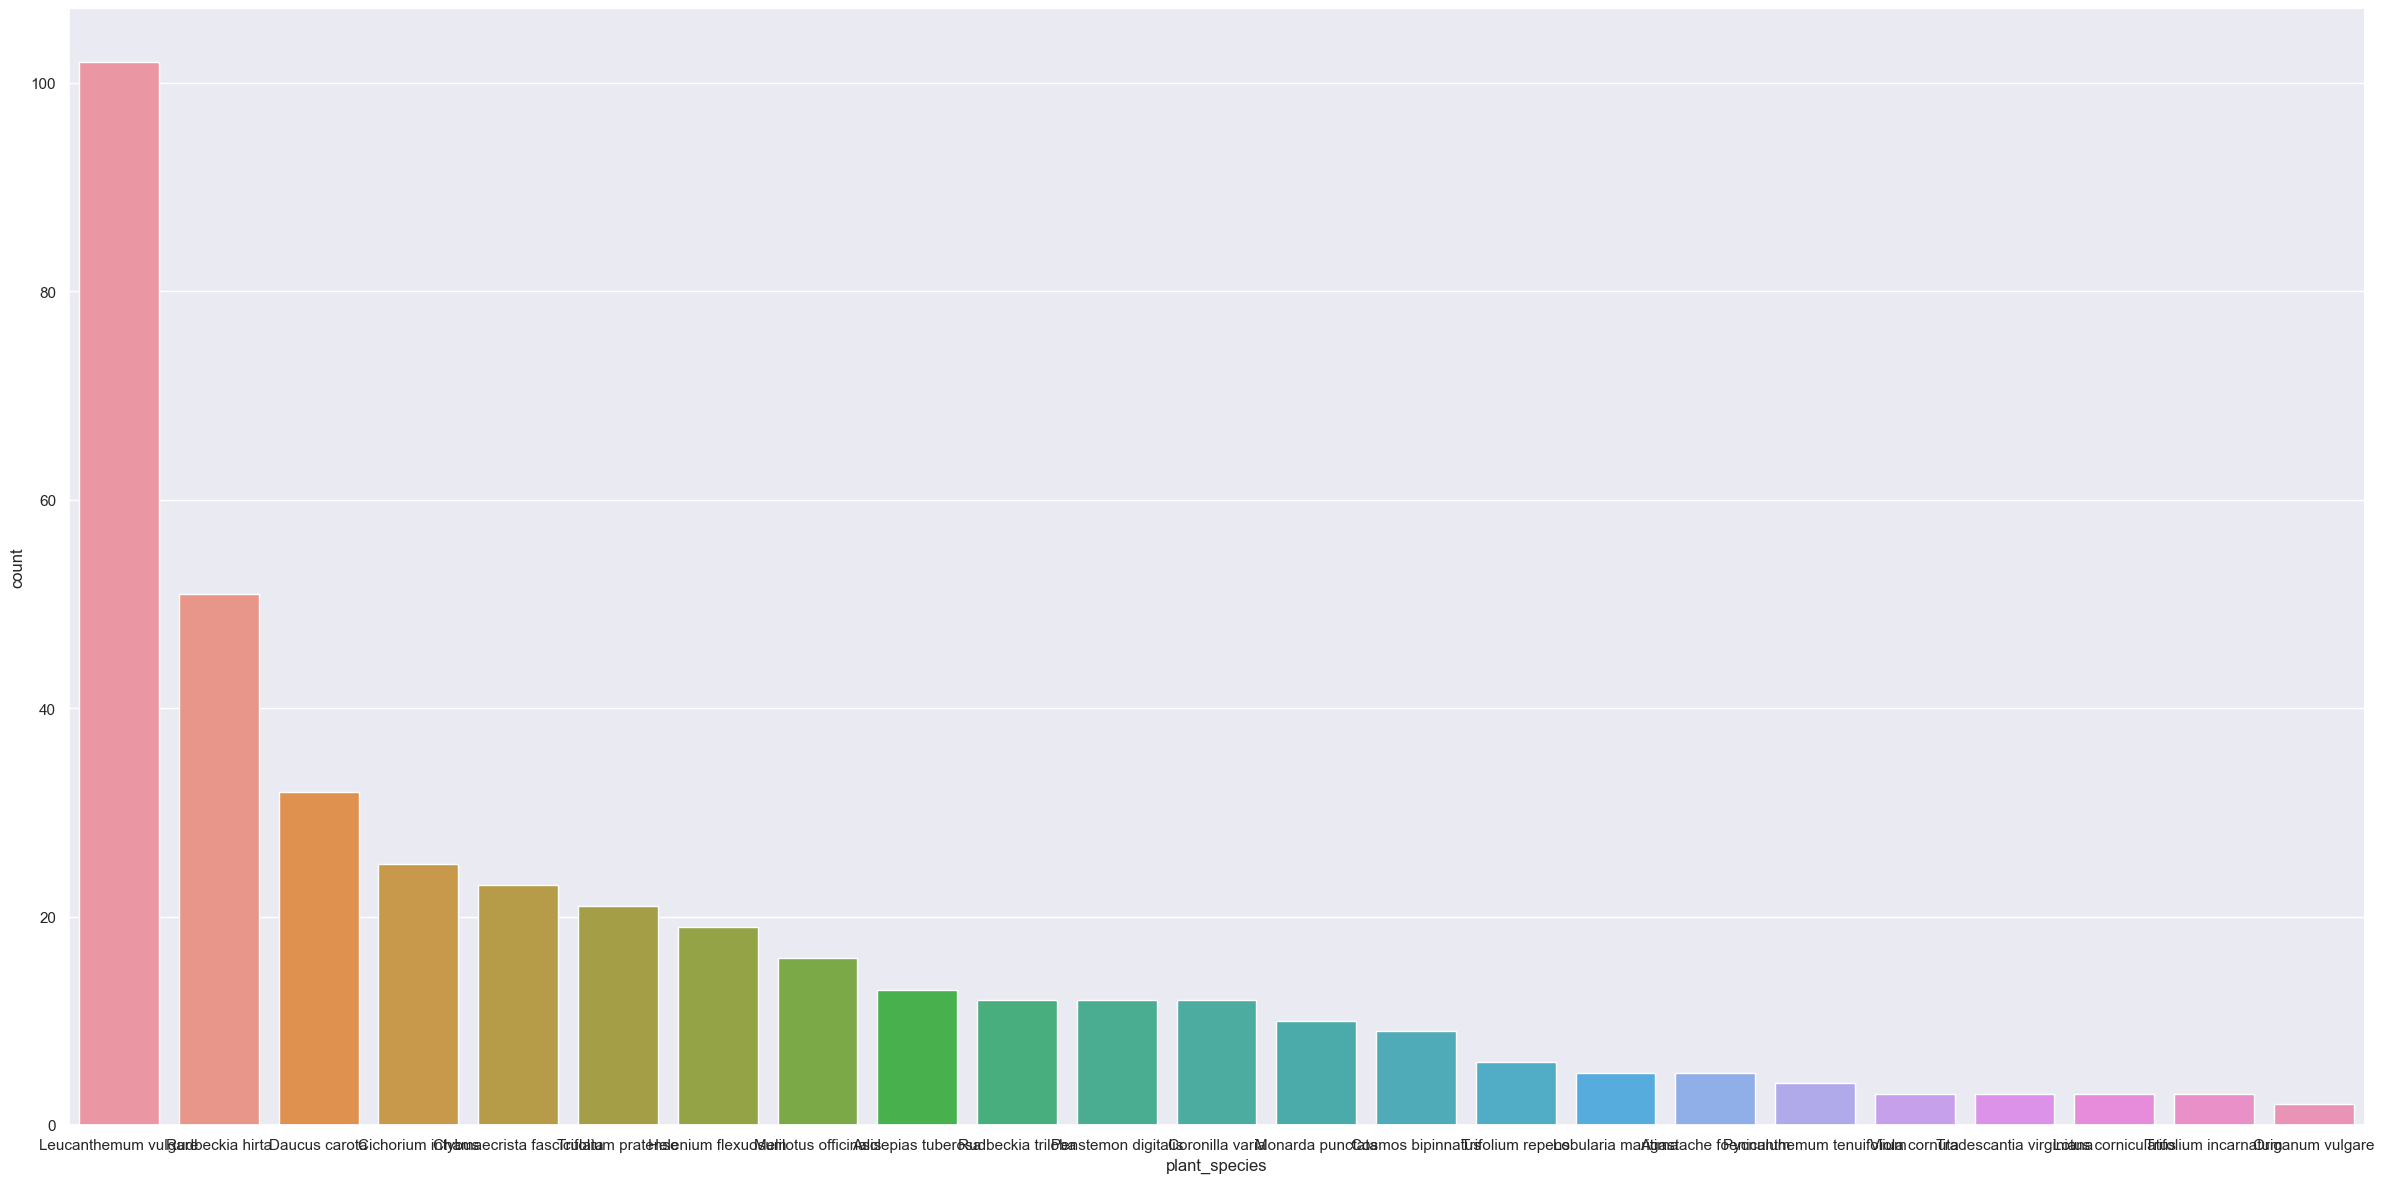

In [171]:
# Get the total plant species counts and order them
total_plant_counts = bees[bees['plant_species']!='None']['plant_species'].value_counts()
total_plant_counts_ordered = total_plant_counts.sort_values(ascending=False).index.to_list()

# Plot bar chart of plant species counts ordered by total count
sns.set_palette('pastel')
g = sns.catplot(x='plant_species', data=bees, kind='count', height=12, aspect=2, order=total_plant_counts_ordered)

### Plants at different sites

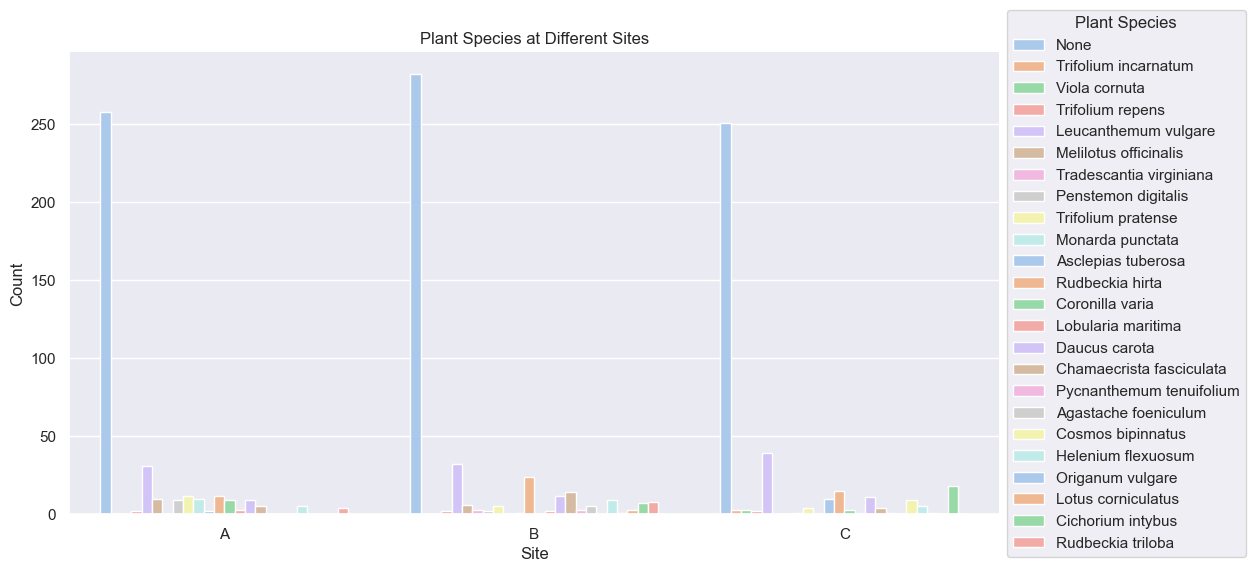

In [172]:
plt.figure(figsize=(12,6))
sns.countplot(data=bees, x='site', hue='plant_species', palette='pastel')
plt.title('Plant Species at Different Sites')
plt.xlabel('Site')
plt.ylabel('Count')
plt.legend(title='Plant Species', loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()

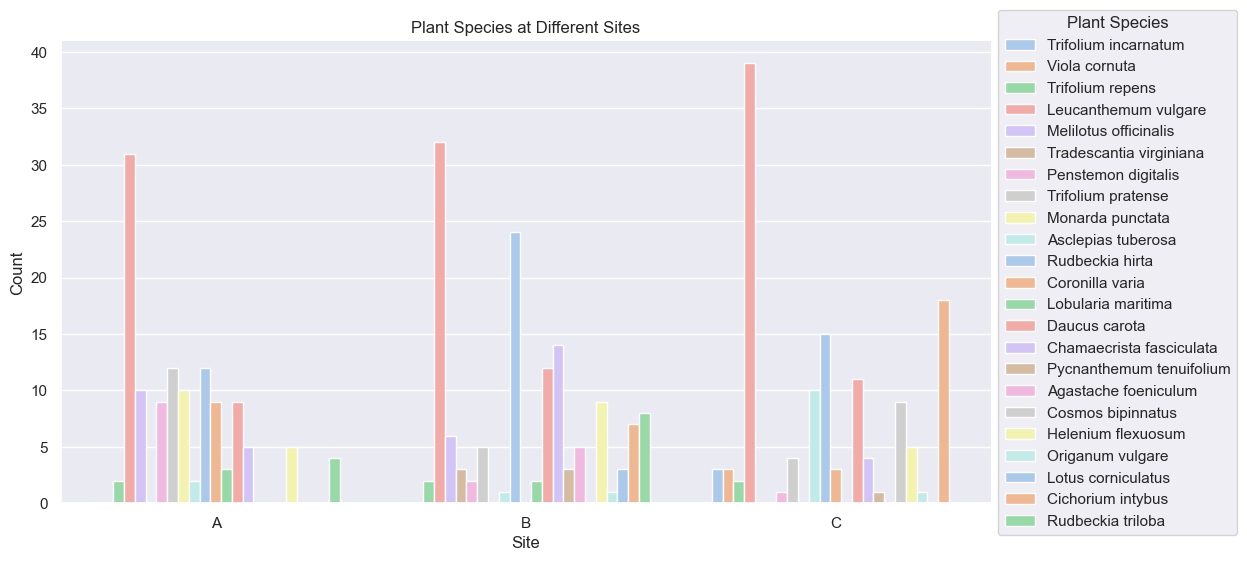

In [173]:
bees_modified = bees[bees['plant_species']!='None']
plt.figure(figsize=(12,6))
sns.countplot(data=bees_modified, x='site', hue='plant_species', palette='pastel')
plt.title('Plant Species at Different Sites')
plt.xlabel('Site')
plt.ylabel('Count')
plt.legend(title='Plant Species', loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()